### Zadanie

1. Načítajte súbor `Accidents.csv`, rozdeľte ho na tri tabuľky podľa hodnôt atribútu `Accident_Severity` (do prvej tabuľky vyberte iba hodnoty 1 - `Fatal`, do druhej 2 - `Serious` a do tretej 3 - `Slight`). (2b)



In [1]:
# import knižníc a inicializácia knižnice seaborn 
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
# načítanie dát
data = pd.read_csv("./data/Accidents.csv")
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,0,5,4,1,1,0,0,1,1,E01002909
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,0,0,4,1,1,0,0,1,1,E01002857
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,0,0,1,1,1,0,0,1,1,E01002840
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,0,0,7,1,2,0,0,1,1,E01002863


In [3]:
# vypísanie počtu hodnôt dátového setu
print(data.shape)

(198735, 32)


In [4]:
# rozdelenie na 3 tabuľky podľa hodnôt atribútu Accident_Severity
Fatal_Accidents = data[data["Accident_Severity"] == 1]
Serious_Accidents = data[data["Accident_Severity"] == 2]
Slight_Accidents = data[data["Accident_Severity"] == 3]

# vypísanie počtu hodnôt
print(Fatal_Accidents.shape)
print(Serious_Accidents.shape)
print(Slight_Accidents.shape)

(2913, 32)
(25029, 32)
(170793, 32)


2. Z tabuľky pre hodnoty `Slight` náhodne vyberte 10% príkladov pomocou metódy `sample`. Nasledujúci príklad kódu zobrazuje použitie tejto metódy. (2b)

In [ ]:
# `frac` udáva koľko príkladov sa má náhodne vybrať (0.1 = 10%), `random_state` inicializuje generátor
# náhodných čísel, aby sme vždy dostali rovnaký výber
# sample_data = accidents_slight.sample(frac=0.1, random_state=1234)

In [5]:
# náhodný výber 10% príkladov hodnoty Slight pomocou metódy sample
sample_Slight_Accidents = Slight_Accidents.sample(frac=0.1, random_state=1234)

In [6]:
# vypísanie počtu hodnôt náhodného výberu
print(sample_Slight_Accidents.shape)

(17079, 32)


3. Spojte všetky tri tabuľky do upravenej tabuľky `Accidents`, ktorá bude obsahovať 10% príkladov `Slight` a všetky príklady závažnosti `Fatal` a `Serious`. Po spojení by ste mali mať 45 021 príkladov. (2b)

In [7]:
# spojenie do tabuľky Accidets a vypísanie počtu hodnôt
Accidents = pd.concat([sample_Slight_Accidents, Fatal_Accidents, Serious_Accidents], ignore_index=True, sort=False)

print(Accidents.shape)

(45021, 32)


4. Spojte upravenú tabuľku `Accidents` s tabuľkou `Vehicles` podľa kľúča `Accident_Index` tak, aby vo výslednej tabuľke boli iba vozidla nehôd z upravenej tabuľky `Accidents`. Po spojení by ste mali dostať redukovanú trénovaciu množinu s menším počtom príkladov, ktorú budete ďalej používať pre analýzu dát. Keďže sme zmenšili počet menej závažných príkladov, zvýšili sme tým váhu príkladov s väčšou závažnosťou. (2b)


In [8]:
# načítanie dát - tabuľky Vehicles
Vehicles = pd.read_csv("./data/Vehicles.csv")
Vehicles.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type
0,200501BS00001,1,9,0,18,0,0,0,0,0,...,1,15,2,74,10,-1,-1,-1,7,1
1,200501BS00002,1,11,0,4,0,3,0,0,0,...,1,1,1,42,7,8268,2,3,-1,-1
2,200501BS00003,1,11,0,17,0,0,0,4,0,...,1,1,1,35,6,8300,2,5,2,1
3,200501BS00003,2,9,0,2,0,0,0,0,0,...,1,15,1,62,9,1762,1,6,1,1
4,200501BS00004,1,9,0,18,0,0,0,0,0,...,1,15,2,49,8,1769,1,4,2,1


In [9]:
# vypísanie počtu hodnôt dátového setu - tabuľky Vehicles
print(Vehicles.shape)

(366236, 22)


In [10]:
# spojenie tabuliek podľa kľúča Accident_Index 
Accidents_together = pd.merge(left=Accidents, right=Vehicles, left_on="Accident_Index", right_on="Accident_Index", how="inner")

In [11]:
# vypísanie počtu hodnôt
print(Accidents_together.shape)

(79382, 53)


5. Pre ďalšiu analýzu vyberte iba nasledujúce atribúty:
    * `Day_of_Week`
    * `1st_Road_Class`
    * `Road_Type`
    * `Light_Conditions`
    * `Weather_Conditions`     
    * `Road_Surface_Conditions`
    * `Urban_or_Rural_Area`
    * `Vehicle_Type`
    * `Sex_of_Driver`
    * `Age_of_Driver`
    * `Engine_Capacity_(CC)`
    * `Age_of_Vehicle`
    * `Accident_Severity` 
    
Takúto selekciu atribútov urobíme kvôli odstráneniu redundantných atribútov v datasete. Nepoužijeme redundantné atribúty popisujúce napr. geolokalitu, atď., prípadne odstránime atribúty, ktoré pre predikciu nemôžu byť použité (nie sú známe pred výskytom samotnej nehody). (2b)


In [12]:
# selekcia atribútov
Selected_Accidents = Accidents_together[["Day_of_Week", "1st_Road_Class", "Road_Type", "Light_Conditions", "Weather_Conditions", "Road_Surface_Conditions", "Urban_or_Rural_Area", "Vehicle_Type", "Sex_of_Driver", "Age_of_Driver", "Engine_Capacity_(CC)", "Age_of_Vehicle", "Accident_Severity"]]

In [13]:
# vypísanie počtu hodnôt
print(Selected_Accidents.shape)

(79382, 13)


In [14]:
# vypísanie hlavičky
Selected_Accidents.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity
0,2,4,6,1,8,1,1,9,1,-1,-1,-1,3
1,2,4,6,1,8,1,1,1,1,26,-1,-1,3
2,5,1,3,1,1,2,2,9,2,72,998,5,3
3,5,1,3,1,1,2,2,9,2,44,1461,1,3
4,5,1,3,1,1,2,2,19,1,40,2461,1,3


In [15]:
# skopírovanie testovacej množiny a kontrola počtu hodnôt
test = Selected_Accidents
print(test.shape)

(79382, 13)


6. Spočítajte počet chýbajúcich hodnôt pre jednotlivé atribúty. Vhodne doplňte chýbajúce hodnoty (pozor: chýbajúce hodnoty sú označené -1).(4b)


In [16]:
#zistenie počtu chýbajúcich hodnôt
test.isna().sum()


Day_of_Week                0
1st_Road_Class             0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Vehicle_Type               0
Sex_of_Driver              0
Age_of_Driver              0
Engine_Capacity_(CC)       0
Age_of_Vehicle             0
Accident_Severity          0
dtype: int64

In [17]:
# zámena chýbajúcich hodnôt z -1 na nan  a zistenie počtu chýbajúcich hodnôt
test = test.replace(-1, np.nan)
test.isna().sum()

Day_of_Week                    0
1st_Road_Class                 0
Road_Type                      0
Light_Conditions               0
Weather_Conditions             0
Road_Surface_Conditions       80
Urban_or_Rural_Area            0
Vehicle_Type                  14
Sex_of_Driver                  7
Age_of_Driver               7784
Engine_Capacity_(CC)       24978
Age_of_Vehicle             27406
Accident_Severity              0
dtype: int64

In [18]:
# zistenie najpočetnejšej množiny hodnôt pre Road_Surface_Conditions 
test["Road_Surface_Conditions"].value_counts()

1.0    54700
2.0    23007
4.0     1147
3.0      358
5.0       90
Name: Road_Surface_Conditions, dtype: int64

In [19]:
# nahradenie chýbajúcich hodnôt pre Road_Surface_Conditions na 1.0 a kontrola
test["Road_Surface_Conditions"] = test["Road_Surface_Conditions"].fillna(1.0)

test.isna().sum()

Day_of_Week                    0
1st_Road_Class                 0
Road_Type                      0
Light_Conditions               0
Weather_Conditions             0
Road_Surface_Conditions        0
Urban_or_Rural_Area            0
Vehicle_Type                  14
Sex_of_Driver                  7
Age_of_Driver               7784
Engine_Capacity_(CC)       24978
Age_of_Vehicle             27406
Accident_Severity              0
dtype: int64

In [20]:
# zistenie najpočetnejšej množiny hodnôt pre Road_Surface_Conditions - kontrola
test["Road_Surface_Conditions"].value_counts()

1.0    54780
2.0    23007
4.0     1147
3.0      358
5.0       90
Name: Road_Surface_Conditions, dtype: int64

In [21]:
# zistenie najpočetnejšej množiny hodnôt pre Vehicle_Type 
test["Vehicle_Type"].value_counts()

9.0     55695
5.0      4434
1.0      3929
19.0     3514
21.0     2463
3.0      2121
11.0     2018
2.0      1321
8.0      1180
4.0       908
20.0      698
90.0      532
10.0      281
17.0      230
16.0       32
18.0       12
Name: Vehicle_Type, dtype: int64

In [22]:
# nahradenie chýbajúcich hodnôt pre Vehicle_Type na 9.0 a kontrola
test["Vehicle_Type"] = test["Vehicle_Type"].fillna(9.0)

test.isna().sum()

Day_of_Week                    0
1st_Road_Class                 0
Road_Type                      0
Light_Conditions               0
Weather_Conditions             0
Road_Surface_Conditions        0
Urban_or_Rural_Area            0
Vehicle_Type                   0
Sex_of_Driver                  7
Age_of_Driver               7784
Engine_Capacity_(CC)       24978
Age_of_Vehicle             27406
Accident_Severity              0
dtype: int64

In [23]:
# zistenie najpočetnejšej množiny hodnôt pre Vehicle_Type - kontrola
test["Vehicle_Type"].value_counts()

9.0     55709
5.0      4434
1.0      3929
19.0     3514
21.0     2463
3.0      2121
11.0     2018
2.0      1321
8.0      1180
4.0       908
20.0      698
90.0      532
10.0      281
17.0      230
16.0       32
18.0       12
Name: Vehicle_Type, dtype: int64

In [24]:
# nahradenie chýbajúcich hodnôt pre Sex_of_Driver na 3 (Not known) a kontrola
test["Sex_of_Driver"] = test["Sex_of_Driver"].fillna(3)

test.isna().sum()

Day_of_Week                    0
1st_Road_Class                 0
Road_Type                      0
Light_Conditions               0
Weather_Conditions             0
Road_Surface_Conditions        0
Urban_or_Rural_Area            0
Vehicle_Type                   0
Sex_of_Driver                  0
Age_of_Driver               7784
Engine_Capacity_(CC)       24978
Age_of_Vehicle             27406
Accident_Severity              0
dtype: int64

In [25]:
# zobrazenie štatistík pre Age_of_Driver
test["Age_of_Driver"].describe()

count    71598.000000
mean        37.864493
std         15.839549
min          3.000000
25%         25.000000
50%         36.000000
75%         48.000000
max         98.000000
Name: Age_of_Driver, dtype: float64

In [26]:
# nahradenie chýbajúcich hodnôt pre Age_of_Driver mediánom a kontrola
test["Age_of_Driver"] = test["Age_of_Driver"].fillna(test["Age_of_Driver"].median())

test.isna().sum() 

Day_of_Week                    0
1st_Road_Class                 0
Road_Type                      0
Light_Conditions               0
Weather_Conditions             0
Road_Surface_Conditions        0
Urban_or_Rural_Area            0
Vehicle_Type                   0
Sex_of_Driver                  0
Age_of_Driver                  0
Engine_Capacity_(CC)       24978
Age_of_Vehicle             27406
Accident_Severity              0
dtype: int64

In [27]:
# zobrazenie štatistík pre Engine_Capacity_(CC)
test["Engine_Capacity_(CC)"].describe()

count    54404.000000
mean      1918.808396
std       1863.972318
min          6.000000
25%       1242.000000
50%       1597.000000
75%       1991.000000
max      59880.000000
Name: Engine_Capacity_(CC), dtype: float64

In [28]:
# nahradenie chýbajúcich hodnôt pre Engine_Capacity_(CC) mediánom a kontrola
test["Engine_Capacity_(CC)"] = test["Engine_Capacity_(CC)"].fillna(test["Engine_Capacity_(CC)"].median())

test.isna().sum()

Day_of_Week                    0
1st_Road_Class                 0
Road_Type                      0
Light_Conditions               0
Weather_Conditions             0
Road_Surface_Conditions        0
Urban_or_Rural_Area            0
Vehicle_Type                   0
Sex_of_Driver                  0
Age_of_Driver                  0
Engine_Capacity_(CC)           0
Age_of_Vehicle             27406
Accident_Severity              0
dtype: int64

In [29]:
# zobrazenie štatistík pre Age_of_Vehicle
test["Age_of_Vehicle"].describe()

count    51976.000000
mean         6.658227
std          4.443063
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         84.000000
Name: Age_of_Vehicle, dtype: float64

In [30]:
# nahradenie chýbajúcich hodnôt pre Age_of_Vehicle mediánom a kontrola
test["Age_of_Vehicle"] = test["Age_of_Vehicle"].fillna(test["Age_of_Vehicle"].median())

test.isna().sum()

Day_of_Week                0
1st_Road_Class             0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Vehicle_Type               0
Sex_of_Driver              0
Age_of_Driver              0
Engine_Capacity_(CC)       0
Age_of_Vehicle             0
Accident_Severity          0
dtype: int64

7. Pomocou konfigenčnej tabuľky vyjadrite závislosti medzi nasledujúcimi atribútmi a cieľovým atribútom `Accident_Severity`:
* `Day_of_Week` 
* `Sex_of_Driver`
* `Age_of_Driver` (nutné vhodne diskretizovať tento atribút)

Použite niektorú z vizualizácií knižnice seaborn na grafické zobrazenie týchto vzťahov. (5b)

In [31]:
# zistenie najpočetnejšej množiny hodnôt pre Sex_of_Driver
test["Sex_of_Driver"].value_counts()

1.0    56005
2.0    19020
3.0     4357
Name: Sex_of_Driver, dtype: int64

In [32]:
# vynechanie atribútu Sex_of_Driver má hodnotu 3(Not known) - vzľadom na zanedbateľný počet
test = test.query("Sex_of_Driver != 3")
test["Sex_of_Driver"].value_counts()

1.0    56005
2.0    19020
Name: Sex_of_Driver, dtype: int64

In [33]:
# zobrazenie štatistík pre Age_of_Driver
test["Age_of_Driver"].describe()

count    75025.000000
mean        37.789803
std         15.459793
min          3.000000
25%         25.000000
50%         36.000000
75%         47.000000
max         98.000000
Name: Age_of_Driver, dtype: float64

In [34]:
# max vek vodiča 98, minimálny vek vodiča  3 ???
# diskretizácia atribútu Age_of_Driver
test["Age_of_Driver_ordinal"] = pd.cut(test["Age_of_Driver"], bins=[3, 18, 35, 45, 61, 98], include_lowest=True, labels=["Children", "Young", "Middle_Age", "Older", "Senior"])
test["Age_of_Driver_ordinal"].value_counts()

Young         29171
Middle_Age    19253
Older         14553
Senior         6089
Children       5959
Name: Age_of_Driver_ordinal, dtype: int64

In [35]:
# konfigenčná tabuľka
pd.pivot_table(test, index=["Day_of_Week", "Sex_of_Driver", "Accident_Severity"], values="Age_of_Driver", aggfunc=["median", "mean", "min", "max", "count"], margins=True)                                                           

median          mean  \
                                            Age_of_Driver Age_of_Driver   
Day_of_Week Sex_of_Driver Accident_Severity                               
1           1.0           1                          36.0     38.272864   
                          2                          36.0     36.819786   
                          3                          34.0     35.755499   
            2.0           1                          36.0     39.356436   
                          2                          36.0     38.170662   
                          3                          34.0     35.731771   
2           1.0           1                          37.0     40.242370   
                          2                          36.0     38.271166   
                          3                          36.0     38.215233   
            2.0           1                          41.0     44.614035   
                          2                          36.0     38.750000   
                          3                          36.0     36.904100   
3           1.0           1                          38.0     40.667870   
                          2                          36.0     37.971887   
                          3                          36.0     37.557445   
            2.0           1                          36.0     38.237624   
                          2                          36.0     38.428148   
                          3                          36.0     37.334951   
4           1.0           1                          38.0     39.866290   
                          2                          36.0     38.161027   
                          3                          36.0     37.925321   
            2.0           1                          36.0     39.707483   
                          2                          36.0     38.522942   
                          3                          36.0     37.681392   
5           1.0           1                          39.0     40.881262   
                          2                          36.0     37.858026   
                          3                          36.0     38.065051   
            2.0           1                          40.0     43.172414   
                          2                          38.0     39.860145   
                          3                          36.0     37.381479   
6           1.0           1                          38.0     40.400908   
                          2                          36.0     37.408400   
                          3                          36.0     37.826651   
            2.0           1                          40.0     43.044248   
                          2                          36.0     38.481233   
                          3                          35.0     36.841689   
7           1.0           1                          35.0     37.979740   
                          2                          35.0     36.273698   
                          3                          36.0     37.537709   
            2.0           1                          36.0     40.580882   
                          2                          36.0     38.627984   
                          3                          35.0     36.176583   
All                                                  36.0     37.789803   

                                                      min           max  \
                                            Age_of_Driver Age_of_Driver   
Day_of_Week Sex_of_Driver Accident_Severity                               
1           1.0           1                           9.0          88.0   
                          2                           6.0          93.0   
                          3                           8.0          91.0   
            2.0           1                          18.0          85.0   
                          2                           7.0          92.0   


In [36]:
# konfigenčná tabuľka
pd.pivot_table(test, index=["Age_of_Driver_ordinal", "Sex_of_Driver"], columns="Day_of_Week", values="Accident_Severity", aggfunc="mean")

Day_of_Week                                 1         2         3         4  \
Age_of_Driver_ordinal Sex_of_Driver                                           
Children              1.0            2.249645  2.292800  2.332344  2.302711   
                      2.0            2.307692  2.433566  2.477124  2.450000   
Young                 1.0            2.261113  2.297151  2.323986  2.327657   
                      2.0            2.395566  2.488330  2.478477  2.430807   
Middle_Age            1.0            2.249856  2.380051  2.360805  2.358913   
                      2.0            2.343115  2.504021  2.458172  2.503650   
Older                 1.0            2.195507  2.302769  2.283479  2.320102   
                      2.0            2.308782  2.415584  2.469274  2.457483   
Senior                1.0            2.191682  2.217125  2.264122  2.255917   
                      2.0            2.225806  2.227723  2.376147  2.300000   

Day_of_Week                                 5         6         7  
Age_of_Driver_ordinal Sex_of_Driver                                
Children              1.0            2.331903  2.257104  2.234474  
                      2.0            2.431373  2.439560  2.331361  
Young                 1.0            2.314305  2.318567  2.239587  
                      2.0            2.509565  2.487509  2.411940  
Middle_Age            1.0            2.372361  2.343103  2.311594  
                      2.0            2.456494  2.456919  2.430631  
Older                 1.0            2.282424  2.270377  2.268615  
                      2.0            2.420622  2.423263  2.335541  
Senior                1.0            2.297297  2.281501  2.258410  
                      2.0            2.254237  2.287554  2.213270

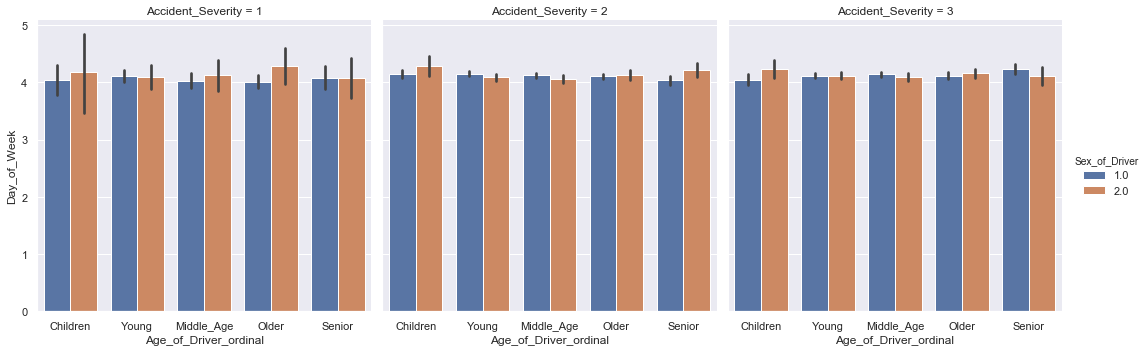

In [37]:
# grafické zobrazenie 

g = sns.catplot(x="Age_of_Driver_ordinal", y="Day_of_Week", hue="Sex_of_Driver", col="Accident_Severity", data=test, kind="bar")

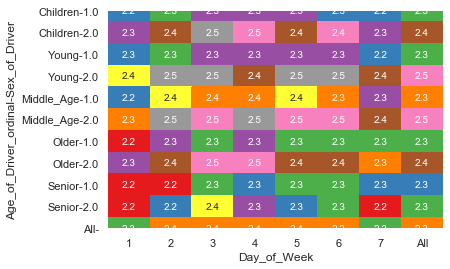

In [38]:
# grafické zobrazenie kontingenčnej tabuľky
table = pd.pivot_table(test, index=["Age_of_Driver_ordinal", "Sex_of_Driver"], columns="Day_of_Week", values="Accident_Severity", aggfunc="mean", margins=True)
g = sns.heatmap(table, annot=True, cbar=False, cmap="Set1", )

8. Vytvorte dátovú množinu, v ktorej nahradíte všetky nominálne atribúty za číselné alebo binárne. (3b)

In [39]:
# transformácia atribútu Age_of_Driver_Ordinal

test["Age_of_Driver_ordinal"] = test["Age_of_Driver_ordinal"].map({"Children": 0, "Young": 1, "Middle_Age": 2, "Older": 3, "Senior": 4}) 
test.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Age_of_Driver_ordinal
0,2,4,6,1,8,1.0,1,9.0,1.0,36.0,1597.0,6.0,3,2
1,2,4,6,1,8,1.0,1,1.0,1.0,26.0,1597.0,6.0,3,1
2,5,1,3,1,1,2.0,2,9.0,2.0,72.0,998.0,5.0,3,4
3,5,1,3,1,1,2.0,2,9.0,2.0,44.0,1461.0,1.0,3,2
4,5,1,3,1,1,2.0,2,19.0,1.0,40.0,2461.0,1.0,3,2


In [40]:
# skopírovanie testovacej množiny a kontrola počtu hodnôt
Dataset = test
print(Dataset.shape)

(75025, 14)


In [41]:
# odstranenie stlpca Age_of_Driver a kontrola počtu hodnôt
Dataset.drop(columns=["Age_of_Driver"], inplace=True)
print(Dataset.shape)

(75025, 13)


9. Rozdeľte dáta na trénovaciu a testovaciu množinu v pomere 70/30. Ako cieľový atribút použite atribút `Accident_Severity`. (2b)

In [42]:
# rozdelenie dát na trénovaciu a testovaciu množinu v pomere 70/30
X_Dataset = Dataset.drop('Accident_Severity', axis=1)
y_Dataset = Dataset['Accident_Severity']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Dataset, y_Dataset, test_size=0.3, random_state=1) 

print("Trenovacia mnozina:")
print(X_train.shape)
print(y_train.shape)
print("Testovacia mnozina:")
print(X_test.shape)
print(y_test.shape)

Trenovacia mnozina:
(52517, 12)
(52517,)
Testovacia mnozina:
(22508, 12)
(22508,)


10. Spočítajte pomocou funkcie `SelectKBest` a `mutual_score_info` významosti jednotlivých atribútov pre predikciu v trénovacej množine. Skúste získané informácie využiť pri predspracovaní dát pre niektoré z modelov. (3b)

In [43]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

fs = SelectKBest(score_func=mutual_info_classif, k="all")
fs.fit(X_train, y_train)


SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x00000249B9DC9678>)

Atribut 0: 0.003761
Atribut 1: 0.006849
Atribut 2: 0.008628
Atribut 3: 0.016086
Atribut 4: 0.003699
Atribut 5: 0.004126
Atribut 6: 0.016472
Atribut 7: 0.021115
Atribut 8: 0.003740
Atribut 9: 0.012499
Atribut 10: 0.002432
Atribut 11: 0.002213


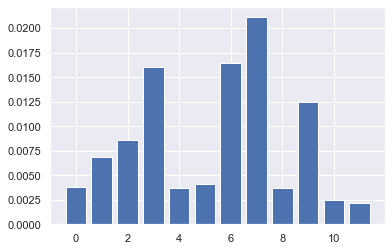

In [44]:
for i in range(len(fs.scores_)):
    print("Atribut %d: %f" % (i, fs.scores_[i]))
    
    
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

11. Natrénujte rôzne klasifikačné modely pre predikciu atribútu `Accident_Severity`. Natrénujte nasledovné modely s prednastavenými parametrami:
* k-najbližších susedov
* Rozhodovacie stromy
* Random forests

Jednotlivé modely otestujte pomocou 10-násobnej krížovej validácie pomocou metriky `accuracy`. 

Pozor - pre jednotlivé modely zvoľte vhodný spôsob predspracovania (možná modifikácia predspracovania v kroku 8). (6b) 

In [45]:
# model k-najbližších susedov - rozdelenie dát na trénovaciu a testovaciu množinu v pomere 70/30

Dataset1 = Dataset
X_Dataset1 = Dataset1.drop('Accident_Severity', axis=1)
y_Dataset1 = Dataset1['Accident_Severity']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Dataset1, y_Dataset1, test_size=0.3, random_state=1) 

print("Trenovacia mnozina:")
print(X_train.shape)
print(y_train.shape)
print("Testovacia mnozina:")
print(X_test.shape)
print(y_test.shape)

Trenovacia mnozina:
(52517, 12)
(52517,)
Testovacia mnozina:
(22508, 12)
(22508,)


In [46]:
# model k-najbližších susedov - trénovanie
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=29)       
knn.fit(X_train, y_train) 
y_knn = knn.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score 
print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_knn)}") 
# print(f"Presnosť (precision) modelu: {precision_score(y_test, y_knn)}") - nefunguje
# print(f"Návratnosť (recall) modelu: {recall_score(y_test, y_knn)}") - nefunguje

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_knn) 
print(cm)

Presnosť (accuracy) modelu: 0.5382974942242759
[[   2 1185  275]
 [  10 9105 2843]
 [   1 6078 3009]]


In [47]:
# model Rozhodovacie stromy - rozdelenie dát na trénovaciu a testovaciu množinu v pomere 70/30
Dataset2 = Dataset

X_Dataset2 = Dataset2.drop("Accident_Severity", axis=1)
y_Dataset2 = Dataset2["Accident_Severity"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Dataset2, y_Dataset2, test_size=0.3, random_state=1) 

print("Trenovacia mnozina:")
print(X_train.shape)
print(y_train.shape)
print("Testovacia mnozina:")
print(X_test.shape)
print(y_test.shape)


Trenovacia mnozina:
(52517, 12)
(52517,)
Testovacia mnozina:
(22508, 12)
(22508,)


In [48]:
# model Rozhodovacie stromy - trénovanie
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(max_depth=5)   
dt.fit(X_train, y_train)
y_dt = dt.predict(X_test) 

from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix
print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_dt)}") 
# print(f"Presnosť (precision) modelu: {precision_score(y_test, y_dt)}") - nefunguje
# print(f"Návratnosť (recall) modelu: {recall_score(y_test, y_dt)}") - nefunguje

cm = confusion_matrix(y_test, y_dt) 
print(cm)

Presnosť (accuracy) modelu: 0.5684645459392216
[[   0 1288  174]
 [   0 8896 3062]
 [   0 5189 3899]]


In [49]:
# model Random forests - rozdelenie dát na trénovaciu a testovaciu množinu v pomere 70/30
Dataset3 = Dataset

X_Dataset3 = Dataset3.drop("Accident_Severity", axis=1)
y_Dataset3 = Dataset3["Accident_Severity"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Dataset3, y_Dataset3, test_size=0.3, random_state=1) 

print("Trenovacia mnozina:")
print(X_train.shape)
print(y_train.shape)
print("Testovacia mnozina:")
print(X_test.shape)
print(y_test.shape)


Trenovacia mnozina:
(52517, 12)
(52517,)
Testovacia mnozina:
(22508, 12)
(22508,)


In [50]:
# model Random forests - trénovanie

from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

rf = RandomForestClassifier(n_estimators=500, max_depth=2) 
rf.fit(X_train, y_train) 
y_rf = rf.predict(X_test) 

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_rf)}") 
# print(f"Presnosť (precision) modelu: {precision_score(y_test, y_rf)}") - nefunguje
# print(f"Návratnosť (recall) modelu: {recall_score(y_test, y_rf)}") - nefunguje

cm = confusion_matrix(y_test, y_rf) 
print(cm)

Presnosť (accuracy) modelu: 0.5338546294650791
[[    0  1459     3]
 [    0 11901    57]
 [    0  8973   115]]


12. Porovnajte natrénované modely aj pomocou ROC krivky testovacej množine. Identifikujte model, ktorý dáva najlepšie výsledky s prednastavenými parametrami. 
V tomto kroku sa posnažte vyladiť model nájdením najvhodnejších parametrov pomocou `GridSearchCV`. Nájdite a vypíšte najlepšiu kombináciu parametrov. (4b)

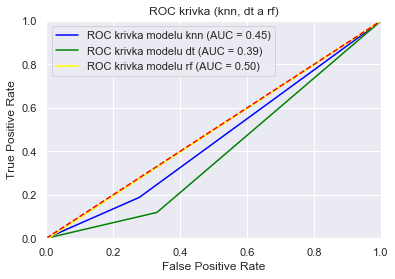

In [51]:
# ROC krivka

y_knn = knn.predict(X_test)
y_dt = dt.predict(X_test)
y_rf = rf.predict(X_test)

from sklearn.metrics import roc_curve,auc 

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_knn, pos_label=1) 
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_dt, pos_label=1) 
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_rf, pos_label=1)

roc_auc_knn = auc(fpr_knn, tpr_knn) 
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.title("ROC krivka (knn, dt a rf)")

plt.plot(fpr_knn, tpr_knn, color="blue", label = "ROC krivka modelu knn (AUC = %0.2f)" % roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, color="green", label = "ROC krivka modelu dt (AUC = %0.2f)" % roc_auc_dt) 
plt.plot(fpr_rf, tpr_rf, color="yellow", label = "ROC krivka modelu rf (AUC = %0.2f)" % roc_auc_rf)

plt.legend(loc = "upper left")
plt.plot([0, 1], [0, 1],linestyle="--", color="red")
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.ylabel("True Positive Rate") 
plt.xlabel("False Positive Rate")
plt.show()


Podľa ROC krivky dáva najlepšie výsledky model Random forests

In [52]:
# GridSearchCV - model k-najbližších susedov - trénovanie
Dataset12 = Dataset
X_Dataset12 = Dataset12.drop('Accident_Severity', axis=1)
y_Dataset12 = Dataset12['Accident_Severity']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Dataset12, y_Dataset12, test_size=0.3, random_state=1) 

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 50))
param_grid_knn = dict(n_neighbors=k_range)

grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring="accuracy") 
grid_knn.fit(X_train, y_train) 


print("Najlepsie parametre:")
print(grid_knn.best_params_)
print("Hodnota presnosti modelu (accuracy) pre tieto parametre:")
print(grid_knn.best_score_)

Najlepsie parametre:
{'n_neighbors': 36}
Hodnota presnosti modelu (accuracy) pre tieto parametre:
0.5389302511567683


In [53]:
# GridSearchCV - model Rozhodovacie stromy - trénovanie

Dataset22 = Dataset

X_Dataset22 = Dataset22.drop("Accident_Severity", axis=1)
y_Dataset22 = Dataset22["Accident_Severity"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Dataset22, y_Dataset22, test_size=0.3, random_state=1) 

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV 

dt = DecisionTreeClassifier()

criterion_range = ['gini', 'entropy']
max_depth_range = [1, 2, 3, 4, 5, 6] 
min_samples_split_range = [2, 4, 6, 8, 10, 12]
min_samples_leaf_range = [1, 5, 10]
presort_range = [True, False]

param_grid_dt = dict(criterion=criterion_range, max_depth=max_depth_range, min_samples_split = min_samples_split_range, min_samples_leaf = min_samples_leaf_range, presort = presort_range )

grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

print('Najlepšia kombinácia parametrov modelu "decision_tree" je:')
print(grid_dt.best_params_)
print()
print('Hodnota presnosti modelu "decision_tree" pri tejto kombinácii je:')
print(grid_dt.best_score_)

Najlepšia kombinácia parametrov modelu "decision_tree" je:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'presort': True}

Hodnota presnosti modelu "decision_tree" pri tejto kombinácii je:
0.5623512386465335


In [ ]:
# GridSearchCV - model Random forests - trénovanie
Dataset32 = Dataset

X_Dataset32 = Dataset32.drop("Accident_Severity", axis=1)
y_Dataset32 = Dataset32["Accident_Severity"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Dataset32, y_Dataset32, test_size=0.3, random_state=1) 

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 

rf = RandomForestClassifier()

n_estimators_range = [100, 300, 500, 700, 900]
oob_score_range = [True, False]
criterion_range = ['gini', 'entropy']
max_depth_range = [1, 2, 3, 4, 5, 6]
min_samples_split_range = [2, 4, 6]
min_samples_leaf_range = [1, 5, 10]

param_grid_rf = dict(n_estimators=n_estimators_range, oob_score=oob_score_range, criterion=criterion_range, max_depth=max_depth_range, min_samples_split = min_samples_split_range, min_samples_leaf = min_samples_leaf_range)

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print('Najlepšia kombinácia parametrov modelu "random_forests" je:')
print(grid_rf.best_params_)
print()
print('Hodnota presnosti modelu "random_forests" pri tejto kombinácii je:')
print(grid_rf.best_score_)

In [ ]:
# robí to neskutočne dlho...

13. Natrénujte na celej trénovacej množine model s najlepšími parametrami. Model otestujte na testovacej množine. Vyhodnoťte model pomocou metrík `accuracy`, `precision` a `recall`. Vypíšte preň `confusion matrix`. (3b)

In [60]:
#  model k-najbližších susedov

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=36)       
knn.fit(X_train, y_train) 
y_knn = knn.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_knn)}") 
# print(f"Presnosť (precision) modelu: {precision_score(y_test, y_knn}") - nefunguje
# print(f"Návratnosť (recall) modelu: {recall_score(y_test, y_knn)}") - nefunguje

cm_ = confusion_matrix(y_test, y_knn) 
print(cm)


Presnosť (accuracy) modelu: 0.5411853563177537
[[   3 1201  258]
 [  10 9259 2689]
 [   3 6166 2919]]


In [61]:
# model Rozhodovacie stromy

dt = DecisionTreeClassifier(max_depth=5,criterion= 'entropy',min_samples_leaf= 1, min_samples_split= 2, presort= True)   
dt.fit(X_train, y_train)       
y_dt = dt.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_dt)}") 
# print(f"Presnosť (precision) modelu: {precision_score(y_test, y_dt)}") - nefunguje
# print(f"Návratnosť (recall) modelu: {recall_score(y_test, y_dt)}") - nefunguje

cm = confusion_matrix(y_test, y_dt) 
print(cm)


Presnosť (accuracy) modelu: 0.5681535454060779
[[   0 1316  146]
 [   0 9069 2889]
 [   0 5369 3719]]


In [63]:
# model Random forest

y_rf = rf.predict(X_test)

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_rf)}") 
# print(f"Presnosť (precision) modelu: {precision_score(y_test, y_rf)}") - nefunguje
# print(f"Návratnosť (recall) modelu: {recall_score(y_test, y_rf)}") - nefunguje

cm = confusion_matrix(y_test, y_rf) 
print(cm)


Presnosť (accuracy) modelu: 0.5338546294650791
[[    0  1459     3]
 [    0 11901    57]
 [    0  8973   115]]
